In [2]:
using Revise
using HypergraphDetectability
using SparseArrays
using LinearAlgebra
using Arpack
using DataFrames
using RCall

┌ Info: Precompiling HypergraphDetectability [2dbe4ab3-0c84-4f8d-86d2-f64d6d698dce]
└ @ Base loading.jl:1260
┌ Warning: Package HypergraphDetectability does not have Parameters in its dependencies:
│ - If you have HypergraphDetectability checked out for development and have
│   added Parameters as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with HypergraphDetectability
└ Loading Parameters into HypergraphDetectability from project dependency, future warnings for HypergraphDetectability are suppressed.
  ** incremental compilation may be fatally broken for this module **



In [18]:
function experiment(n, c₂, c₃; grid₂ = 0.0:0.1:1.0, grid₃ = 0:0.1:1.0, reps = 1)
    DF = DataFrames.DataFrame()
    for p₂ ∈ grid₂, p₃ ∈ grid₃, rep ∈ 1:reps

        H = detectabilityData(n, c₂, c₃, p₂, p₃)

        try
            B_ = HypergraphDetectability.reducedNonBacktrackingMatrix(H);
            E = Arpack.eigs(B_; nev = 3);

            gap = abs(E[1][2]) - abs(E[1][3])

            df = DataFrames.DataFrame(
                p₂ = p₂, 
                p₃ = p₃, 
                e2 = E[1][2],
                e3 = E[1][3]
            )
            DF = vcat(DF, df)
        catch e
            nothing
        end
    end
    return DF
end

experiment (generic function with 1 method)

In [ ]:
# eventually we should try multithreading, but weirdly it doesn't seem
# to be working here, some troubleshooting needed. 

reps = 20

DFs = [DataFrame() for i in 1:reps]

n  = 500
c₂ = 5
c₃ = 5

for rep in 1:reps
    df = experiment(n, c₂, c₃; grid₂ = 0.0:0.01:1.0, grid₃ = 0:0.01:1.0);
    df.thread = Threads.threadid()
    DFs[rep] = df
end

In [77]:
DF = DataFrame()
for df in DFs
    DF = vcat(DF, df)
end

In [78]:
DF.threshold = sqrt(c₂ * 1 + c₃ * 2)
DF.real_part = real.(DF.e2)
DF

┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is deprecated, use `df[!, col_ind] .= v` instead.
│   caller = top-level scope at In[78]:1
└ @ Core In[78]:1


,p₂,p₃,e2,e3,thread,threshold,real_part
,Float64,Float64,Complex…,Complex…,Int64,Float64,Float64
1,0.0,0.01,-8.34339+0.0im,-3.30065+2.20607im,1,3.87298,-8.34339
2,0.0,0.02,-8.06422+0.0im,-0.482757+3.98571im,1,3.87298,-8.06422
3,0.0,0.03,-7.75181+0.0im,-3.11708+2.47119im,1,3.87298,-7.75181
4,0.0,0.04,-7.72631+0.0im,3.71019+1.46315im,1,3.87298,-7.72631
5,0.0,0.05,-7.22574+0.0im,-3.48928+1.75873im,1,3.87298,-7.22574
6,0.0,0.06,-7.61253+0.0im,-3.97459+0.0807906im,1,3.87298,-7.61253
7,0.0,0.08,-7.29332+0.0im,1.28258+3.71677im,1,3.87298,-7.29332
8,0.0,0.09,-6.87235+0.0im,-1.45968+3.68749im,1,3.87298,-6.87235
9,0.0,0.1,-6.81732+0.0im,3.77966+0.921511im,1,3.87298,-6.81732


┌ Warning: RCall.jl: `summarise()` regrouping output by 'p₂', 'p₃' (override with `.groups` argument)
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


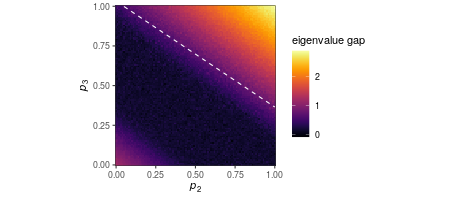

RObject{VecSxp}


┌ Warning: RCall.jl: Warning: Removed 9318 row(s) containing missing values (geom_path).
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


In [79]:
RCall.rcall_p(:options, rcalljl_options=Dict(:width => 450, :height => 200))


R"""
library(tidyverse)

df <- tibble($DF)

df <- df %>% 
    group_by(`p₂`, `p₃`) %>% 
    summarise(`eigenvalue gap` = mean(max(abs(real_part) - threshold), 0)/threshold) 

df <- df %>% 
    mutate(q_3 = (sqrt(2*($c₂ + 2*$c₃)) - (2*`p₂`-1)*$c₂)/(3*$c₃) + 1/3,
           q_3 = ifelse(q_3 > 1, NA, q_3))

df %>% 
    ggplot() + 
    aes(x = `p₂`, y = `p₃`, fill = `eigenvalue gap`) + 
    geom_tile() + 
    geom_line(aes(x = `p₂`, y = q_3), color = "white", linetype = "dashed") + 
    theme_bw() + 
    viridis::scale_fill_viridis(option = "inferno") + 
    scale_x_continuous(expand = c(0, 0)) + 
    scale_y_continuous(expand = c(0, 0)) + 
    theme(strip.background = element_blank(),
          panel.spacing.x = unit(8, "mm"),
          strip.text = element_text(size = 10)) +
    xlab(expression(italic(p)[2])) + 
    ylab(expression(italic(p)[3])) + 
    coord_fixed() 

# ggsave("fig/detectability-second.png")
"""

In [80]:
R"""
# ggsave("fig/detectability-third.png")
"""

┌ Warning: RCall.jl: Saving 7 x 7 in image
│ Warning: Removed 9318 row(s) containing missing values (geom_path).
└ @ RCall /home/phil/.julia/packages/RCall/Qzssx/src/io.jl:160


RObject{NilSxp}
NULL
